<img src="https://www.th-koeln.de/img/logo.svg" style="float: right;" width="200">

### Aufgabenstellung:

Der Datensatz enthält Bilder verscheidener Hautkrebstypen in Partitionen. Diese sind  {gutartig, bösartig}. Entwickeln Sie einen Klassifikator, der die Bilder bestmöglich unterscheidet.

* Julian Weß:11147769 
* Benedikt Sellamier:11149478 
* Jannick Kracht:11147753 
* Cristina Riffarth:11147765

### Beschreibung:

Unser Datensatz beinhaltet Daten über Hautkrebs. Der Datensatz enthält Test und -Trainings Daten, welche jeweils unteretilt sind in bösartigen Hautkrebs und gutartigen.Der Datensatz mit den gutartigen beinhaltet 1800 Bilder, der Satz mit den bösartigen enthält 1497 Bilder. 
Die Bilder sind 224x224 Pixel groß und in RGB.


Somit lässt sich bei unserem Datensatz sagen, dass dieser nicht komplett ausgewogen ist. Wir benutzen bei unseren Datensatz undersampling, um die Daten auszugleichen. 

Wir werden anhand der Daten ein classifier erstellen der möglichst gut beurteilen kann ob ein Bild bösartigen oder gutartigen hautkrebs zeigt.

Bei einer Analyse für einen Datensatz gibt es mehere Kriterien zu beachten, bevor man mit der Analyse beginnen kann. 
Als erstes ist es wichtig sicher zustellen, dass die Datenqualität gut ist, darunter fallen Sachen, wie, dass die Daten vollständig und konsisten sind. Da fehlende oder inkonsistente Daten die Analyse beeintröchtigen können, oder ungenaue Ergebnisse liefern.

Wir haben unsere Daten angeschaut und gesehen, dass einige Bilder sich nicht gut matchen lassen werden, da dort Probleme sind, wie zum Beispile das das Bild aus einer agnz anderen Entfernung aufgenommen ist, oder teilweise Haare vor dem Bild sind. Stark unterschiedliche Bilder können bei Modelen dazu führen, dass die Accuracy schwankt und es zu Overfitting kommen kann.

-- bilder zeigen die nicht passen und die passen (ca 5 bilder) --



what is the main challenge?
Nach der Analyse der Daten gehen wir davon aus das es unsere Hauptaufgabe wird Overfitting so gut wie es geht zu vermeiden und einen dem Datensatz entsprechend guten Classifier zu entwickeln. 



Analyse:

I would like to read a description of your general approach.
How do you want to proceed?

Da der Datensatz sehr ähnlich zum Hunde und Katzen Datensatz aus Übung Acht und Neun hat haben wir uns entschieden die Analyse mit einen einfachen CNN zu starten um für zukünftige Modelle einen Vergleichswert zu schaffen. Sollte unsere Vermutung richtig sein und das Model overfitted haben wir vor Methoden wie z.B. Data Augmentation oder Drop out anzuwenden um die Ergebnisse zu verbessern 


1. vertraut machen mit dem Datensatz 
2. ansacheun der Daten und überlegung der Umsatzung
3. einteilung der aufgaben 
4. starten mit code
5. besprechen der zwischen ergebnisse



Conclsuion

wir haben sachen ausprobiert und es geht nicht


hypothese: wi rglauben wir haben probleme mit overfitting, daten sind schwer zu matchen, 

Accuracy und Binary Cross-Entropy Loss sind zwei wichtige Metriken beim Trainieren von binären Klassifikationsmodellen. Accuracy misst, wie oft das Modell die richtige Klassifizierung vorhersagt, indem es die Anzahl der richtigen Vorhersagen durch die Gesamtzahl der Vorhersagen teilt. Binary Cross-Entropy Loss, misst hingegen, wie gut das Modell die Wahrscheinlichkeiten der beiden Klassen vorhergesagt hat. Ein niedriger Binary Loss bedeutet, dass das Modell die Wahrscheinlichkeiten gut vorhergesagt hat und somit eine hohe Genauigkeit erwartet, werden kann. Es ist wichtig, beide Metriken zu verfolgen, da ein hoher Accuracy-Wert nicht immer bedeutet, dass das Modell gut funktioniert, wenn der Binary Loss-Wert hoch ist.

Wir haben uns für die Accuracy entschieden weil...

Wir haben uns für die Binary Cross-Entropy entschieden weil...

In [15]:
# directory handling 
import os
import glob
import shutil
import pathlib

# assuming the data is in a subdirectory called "data" and fully unzipped
# unzip the data.zip file in the data folder
# if you are using the data.zip file from the moodle, you can use the following code to unzip it

# import zipfile
# with zipfile.ZipFile('../data/data.zip', 'r') as zip_ref:
#     zip_ref.extractall('../data')

# create a directory for the data if it does not exist
pathlib.Path('data').mkdir(parents=True, exist_ok=True)

# create folder for ussage in the notebook
pathlib.Path('data/abgabe_dir').mkdir(parents=True, exist_ok=True)

train_dir = '../data/abgabe_dir/train'
validation_dir = '../data/abgabe_dir/validation'
test_dir = '../data/abgabe_dir/test'

all_data_in_one_folder = '../data/abgabe_dir/all_pictures'

# copy the data to the new folder if data is not already there
if(os.path.exists(all_data_in_one_folder) == False):
    shutil.copytree('../data/train', all_data_in_one_folder, dirs_exist_ok=True)
    shutil.copytree('../data/test', all_data_in_one_folder, dirs_exist_ok=True)

# if(os.path.exists(train_dir) == False):
#     shutil.copytree('../data/train', train_dir)

# if(os.path.exists(validation_dir) == False):
#     shutil.copytree('../data/test', validation_dir)

# if(os.path.exists(test_dir) == False):
#     shutil.copytree('../data/test', test_dir)

# copy 1000 from all_data_in_one_folder/bengin to validation_dir/bengin


def create_abgabe_path(label, size_of_train, size_of_validation, size_of_test):
    train_dir_label = f"../data/abgabe_dir/train/{label}"
    validation_dir_label = f"../data/abgabe_dir/validation/{label}"
    test_dir_label = f"../data/abgabe_dir/test/{label}"

    src_dir = f"../data/abgabe_dir/all_pictures/{label}"

    # if not existst, create the folder
    pathlib.Path(train_dir_label).mkdir(parents=True, exist_ok=True)
    pathlib.Path(validation_dir_label).mkdir(parents=True, exist_ok=True)
    pathlib.Path(test_dir_label).mkdir(parents=True, exist_ok=True)


    fnames = ['{}.jpg'.format(i) for i in range(1,size_of_train)]
    for fname in fnames:
        src = src_dir + "/" + fname
        dst = train_dir_label + "/" + fname
    
        try:
            shutil.copyfile(src, dst)
        except:
            print("File not found: " + src)
            

    fnames = ['{}.jpg'.format(i) for i in range(size_of_train, size_of_train+size_of_validation)]
    for fname in fnames:
        src = src_dir + "/" + fname
        dst = validation_dir_label + "/" + fname    
        
        try:
            shutil.copyfile(src, dst)
        except:
            print("File not found: " + src)
            

    fnames = ['{}.jpg'.format(i) for i in range(size_of_train + size_of_validation, size_of_train + size_of_validation + size_of_test)]
    for fname in fnames:
        src = src_dir + "/" + fname
        dst = test_dir_label + "/" + fname

        try:
            shutil.copyfile(src, dst)
        except:
            print("File not found: " + src)
            

create_abgabe_path("benign", size_of_train=1000, size_of_validation=250, size_of_test=250)
create_abgabe_path("malignant", size_of_train=1000, size_of_validation=250, size_of_test=250)






File not found: ../data/abgabe_dir/all_pictures/malignant/767.jpg
File not found: ../data/abgabe_dir/all_pictures/malignant/776.jpg
File not found: ../data/abgabe_dir/all_pictures/malignant/788.jpg


In [ ]:
import matplotlib.pyplot as plt

def plotting(history):
    # bei einem ist ylim umgesetellt. vllt muss das noch angepasst werden
    
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
from tensorflow.keras.applications import VGG16


def build_basic_model(dropout=0):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu',
                            input_shape=(224, 224, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    # dropout 
    if dropout != 0:
        model.add(layers.Dropout(dropout))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))


    model.compile(loss='binary_crossentropy',
                  optimizer=optimizers.RMSprop(lr=1e-4),
                  metrics=['acc'])
    return model

# test_plan2[7] = {"learning rate": 2e-5, "dropout": 0, "weight regularization": 1e-1}

def build_model_pretrained(n_units, learning_rate, weights=0, dropout=0):
    

    conv_base = VGG16(weights='imagenet',
                      include_top=False,
                      input_shape=(224, 224, 3))
    conv_base.trainable = False

    model = models.Sequential()
    model.add(conv_base)
    model.add(layers.Flatten())
    
    if(weights > 0):
        model.add(layers.Dense(n_units, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=weights, l2=weights)))
    else:
        model.add(layers.Dense(n_units, activation='relu'))
    
    if(dropout > 0):
        model.add(layers.Dropout(dropout))
    
    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer=optimizers.RMSprop(lr=learning_rate),
                  metrics=['acc'])
            
    return model

In [ ]:
model = build_basic_model()

In [ ]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-5),
              metrics=['acc'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be [0,1] standardized
train_datagen = ImageDataGenerator(rescale=1.0/255)
valid_datagen = ImageDataGenerator(rescale=1.0/255)

training_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(224, 244),
        batch_size=20,
        # Since binary_crossentropy loss is used, binary labels are needed
        class_mode='binary')

validation_generator = valid_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 244),
        batch_size=20,
        class_mode='binary')

In [ ]:
%%time

history = model.fit(
            training_generator,
            steps_per_epoch=100,
            epochs=30,
            validation_data=validation_generator,
            validation_steps=25)

In [ ]:
plotting(history)

In unserer Auswertung ist zu sehen, dass während die Training Accuracy steigt die Validierungsgenauigkeit zwischen 0,7 und 0,8 schwankt. Dies deutet auf Overfitting hin. Overfitting tritt auf, wenn das Modell zu gut auf die Trainingsdaten angepasst ist und daher Schwierigkeiten hat, neue, unbekannte Daten richtig zu klassifizieren.

Daher gehen wir im nächsten Schritt auf die Methode der Datenaugmentierung ein, um die Bildinformationen etwas zu diversifizieren.

### Cross Validation:
    
Cross Validation ist ein Verfahren zum Tranieren von Machine-Learning-Modellen. cross valiadtion ist dafür da, den datensatz mir sich selbst zu prüfen, indem tempoär validations daten extraheirt werden. deswegen läuft es mehrmals druch. 

Wir haben uns für die k-fach Kreuzvalidierung (k-fold cross-validation) entschieden, die die Daten in k gleich große Teile aufteilt und jeden Teil als Testset verwendet, während die anderen Teile als Trainingsset verwendet werden.
Sie wird verwendet, um das Risiko von "overfitting" (Überanpassung) zu verringern.


In diesem Fall wird der Datensatz in 70% Traning und 30% validation große Teile aufgeteilt und das Modell wird 3-mal trainiert und getestet. In jeder Iteration wird ein anderer Fold generiert und als Testset verwendet. Während die übrigen Daten als Trainingsset verwendet werden.

Unser Ergebniss Wert bei der coss-validation war: 65 unn die schwankung war bei +-6%. Dieser Wert lässt darauf schließen, dass das Ergebniss der Kreuzvalidierung ein mittel guter Wert ist und auch gegenüber den vorherigen Modellen leider keine verbesserung darstellt.

In [ ]:
# richtiges coding


from tensorflow.keras import layers
from tensorflow.keras import models

from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator


model = build_basic_model()

# All images will be [0,1] standardized
train_datagen = ImageDataGenerator(rescale=1.0/255)

k_fold_dir = "../data/abgabe_dir/all_pictures/"
training_generator = train_datagen.flow_from_directory(
    # This is the target directory
    k_fold_dir,
    # All images will be resized to 150x150
    target_size=(224, 224),
    batch_size=1,
    # Since binary_crossentropy loss is used, binary labels are needed
    class_mode='binary',
    subset='training')


training_data = []

# malignant
max_value = (len(os.listdir(k_fold_dir+"/benign")) + len(os.listdir(k_fold_dir+"/malignant")))
print("the number of pictures in this dic is:",max_value)
for index, x in enumerate(training_generator):
    
    # safe label info as integer
    if(1 in x[1] ):
        temp_to_add = 1
    else:
        temp_to_add = 0

    # ingore the batch size and only take the first element of a list with one element
    for i in x[0]:
        training_data.append([i, temp_to_add])

    if(index % max_value == 0 and index != 0):
        break
    if(index % 100 == 0):
        print(index)

Found 3297 images belonging to 2 classes.
the number of pictures in this dic is: 3297
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200


In [ ]:
import matplotlib.pyplot as plt

len(training_data[3200])

# ebene 1 is the number of pictures 
# ebene 2 is malignant or benign
# ebene 3 is the batch size - this makes problems
# ebene 4 is the picture


# plt.imshow(training_data[1997])

# shows if malignant or benign
# is one
print(training_data[121][1])
# is zero
print(training_data[0][1])


1
0


In [ ]:
import pandas as pd

df = []

for i in training_data:
    dict_before_df = {}
    dict_before_df["label"] = i[1]
    dict_before_df["image"] = i[0]
    df.append(dict_before_df)
df = pd.DataFrame(df)

In [ ]:
from sklearn.model_selection import KFold
import numpy as np

# Define the number of folds
k = 10

# Create a KFold object
kf = KFold(n_splits=k)
scores = []



# Loop over the folds
for train_index, test_index in kf.split(training_data):
    # Get the training and test sets for this fold
    
    temp_train = np.array(training_data)[train_index]

    temp_validate = np.array(training_data)[test_index]
    # y_train, y_test = training_data[train_index][0], training_data[test_index][0]
    
    # temp_train_dir_x = os.listdir(train_dir+"/benign")[train_index[0]:train_index[-1]]
    # temp_train_dir_x.extend(os.listdir(train_dir+"/malignant")[train_index[0]:train_index[-1]])
    # temp_validation_dir_x = os.listdir(validation_dir)[train_index[0]:train_index[-1]]
    # temp_validation_dir_x.extend(os.listdir(validation_dir)[train_index[0]:train_index[-1]])
   
    labels = np.array([x[1] for x in temp_train])
    images = np.array([x[0] for x in temp_train])
    print(len(labels[~np.isnan(labels)]), len(labels))
    print(len(images[~np.isnan(images)]), len(images))

    # images = images[~np.isnan(images)]

    # Train the model on the training set
    model.fit(images ,labels , epochs=10, verbose=1, batch_size=20)

    # Evaluate the model on the test set
    score = model.score(temp_validate, verbose=0)

    # Append the score to a list
    scores.append(score)
    print(score)

# Calculate the mean score
mean_score = np.mean(scores)

C:\Users\Bene\AppData\Local\Temp/ipykernel_20924/1280737057.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  temp_train = np.array(training_data)[train_index]
C:\Users\Bene\AppData\Local\Temp/ipykernel_20924/1280737057.py:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  temp_validate = np.array(training_data)[test_index]


2968 2968
446767104 2968
Epoch 1/10
  3/149 [..............................] - ETA: 3:37 - loss: 1.9828 - acc: 0.4500

KeyboardInterrupt: 

- ergebnis
    - bestätigt das accuracy des models stark von der wahl des trainingsdatensatzes abhängt das ist auf die unterschiedliche qualität der bilder zurückzuführen
- überleitung

# Data Augementation

Data Augmentation beinhaltet verschiedene Verfahren, um künstliche Variationen der Trainingsdaten zu erzeugen. Dadurch wird das Modell dazu angeregt, verschiedene Aspekte der Bilder zu erlernen und somit robustere Vorhersagen zu treffen.

Da Overfitting oft durch mangelnde Datenvielfalt verursacht wird, erhoffen wir uns durch das Anwenden von Data Augemntation und der damit verbunden künstlichen Erhöhung der Datenmenge.

In [ ]:
model = build_basic_model()

In [ ]:
%%time
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(224, 224),
        batch_size=20,
        # Since binary_crossentropy loss is used, binary labels are needed
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='binary')

print("train_dir=",train_dir)
print("validation_dir=",validation_dir)

history = model.fit(
      train_generator,
      steps_per_epoch=30, 
      epochs=30,
      validation_data=validation_generator,
      validation_steps=25)

In [ ]:
plotting(history)

Tatsächlich wurden die Schwankungen der Validierungsgenauigkeit durch die Implementierung der Datenaugmentierung auf ein Minimum reduziert, mit durchschnittlich nur 10%. Trotzdem ist die Genauigkeit des Modells immer noch unter den Erwartungen (maximal 67%), die wir uns gesetzt haben. Dies kann auf verschiedene Faktoren zurückzuführen sein, wie zum Beispiel unzureichende Datenmenge oder Modellarchitektur. Deshalb werden wir uns das nächste Modell ansehen, um zu sehen, ob es die gewünschten Ergebnisse liefert.


# Dropout

Da Overfitting oft durch eine zu starke Anpassung an die Trainingsdaten entsteht, wollen wir Dropout verwenden, um diese Verbindungen zu lockern. Durch das Zufällig Ausschalten von Neuronen im Netzwerk, werden die Features, die tatsächlich auf bösartigen Hautkrebs hinweisen, gezielt mit den richtigen Daten verbunden. So können wir sicherstellen, dass unser Modell allgemeiner und robust gegenüber neuen Daten ist, und somit bessere Ergebnisse liefert.

In [ ]:
build_basic_model(dropout=0.5)

In [ ]:
%%time
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(224, 224),
        batch_size=20,
        # Since binary_crossentropy loss is used, binary labels are needed
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='binary')

print("train_dir=",train_dir)
print("validation_dir=",validation_dir)

history = model.fit(
      train_generator,
      steps_per_epoch=30, 
      epochs=30,
      validation_data=validation_generator,
      validation_steps=25)

Found 1995 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
train_dir= ../data/idea1\train
validation_dir= ../data/idea1\validation
Epoch 1/30
30/30 [==============================] - 24s 779ms/step - loss: 0.6858 - acc: 0.5383 - val_loss: 0.6880 - val_acc: 0.5000
Epoch 2/30
30/30 [==============================] - 23s 779ms/step - loss: 0.6752 - acc: 0.5900 - val_loss: 0.6750 - val_acc: 0.7580
Epoch 3/30
30/30 [==============================] - 23s 754ms/step - loss: 0.6570 - acc: 0.6950 - val_loss: 0.6695 - val_acc: 0.4900
Epoch 4/30
30/30 [==============================] - 22s 733ms/step - loss: 0.6321 - acc: 0.7300 - val_loss: 0.6407 - val_acc: 0.6680
Epoch 5/30
30/30 [==============================] - 22s 734ms/step - loss: 0.6021 - acc: 0.7417 - val_loss: 0.6286 - val_acc: 0.6080
Epoch 6/30
30/30 [==============================] - 23s 759ms/step - loss: 0.5635 - acc: 0.7100 - val_loss: 0.6085 - val_acc: 0.6640
Epoch 7/30
30/30 [=============================

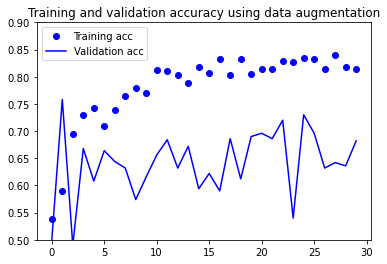

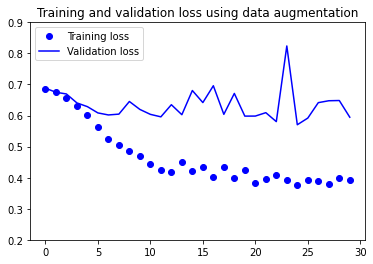

In [ ]:
plotting(history)

Dropout Ergebnis

Überleitung zu pre train cnn

# feature extraction cnn mit data augmentation

Wir haben uns dazu entschieden, ein vortrainiertes Modell zu verwenden, da die Ergebnisse unserer vorherigen Modelle ohne vortrainiertes Modell nicht zufriedenstellend waren. Durch die Verwendung eines vortrainierten Modells haben wir die Möglichkeit, von den Erfahrungen des Modells auf ähnlichen Daten zu profitieren und somit die Leistung unseres Modells zu verbessern.



In [ ]:
from tensorflow.keras.applications import VGG16
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3)) # vorher 150x150,3

In [ ]:
sample_number_train = 1500
sample_number_val = 500
sample_number_test = 660

batch_z = 20

base_dir = '../data/'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = batch_z  #20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 7, 7, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(224, 224), # vorher 150x150
        batch_size=batch_size,
        class_mode='binary')
    
    i = 0
    
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # Note that since generators yield data indefinitely in a loop,
            # we must `break` after every image has been seen once.
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, sample_number_train) # 1500
validation_features, validation_labels = extract_features(validation_dir, sample_number_val) # 500
test_features, test_labels = extract_features(test_dir, sample_number_test) # 660

Found 1500 images belonging to 2 classes.
1/1 [==============================] - 2s 2s/step
Found 500 images belonging to 2 classes.
1/1 [==============================] - 2s 2s/step
Found 660 images belonging to 2 classes.
1/1 [==============================] - 2s 2s/step


In [ ]:
train_features = np.reshape(train_features, (sample_number_train, 7 * 7 * 512))
validation_features = np.reshape(validation_features, (sample_number_val, 7 * 7 * 512))
test_features = np.reshape(test_features, (sample_number_test, 7 * 7 * 512))

In [ ]:
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=7 * 7 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

# compare the parameters with those from Ex.8
model.compile(optimizer= optimizers.RMSprop(lr=2e-5), # set a low learning rate  # optimizers.RMSprop(lr=2e-5) # "rmsprop"
              loss='binary_crossentropy', 
              metrics=['acc']) 

# write everything into a history object and set the same hyperparameters from Ex.8
# train and validate the FC-ANN in one pass
history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Epoch 1/30
75/75 [==============================] - 4s 48ms/step - loss: 0.5504 - acc: 0.7247 - val_loss: 0.5013 - val_acc: 0.7820
Epoch 2/30
75/75 [==============================] - 3s 42ms/step - loss: 0.4214 - acc: 0.8280 - val_loss: 0.5541 - val_acc: 0.7040
Epoch 3/30
75/75 [==============================] - 4s 50ms/step - loss: 0.3683 - acc: 0.8487 - val_loss: 0.4867 - val_acc: 0.7620
Epoch 4/30
75/75 [==============================] - 4s 51ms/step - loss: 0.3477 - acc: 0.8680 - val_loss: 0.4824 - val_acc: 0.7540
Epoch 5/30
75/75 [==============================] - 3s 43ms/step - loss: 0.3246 - acc: 0.8633 - val_loss: 0.4731 - val_acc: 0.7620
Epoch 6/30
75/75 [==============================] - 4s 51ms/step - loss: 0.3051 - acc: 0.8767 - val_loss: 0.4370 - val_acc: 0.7700
Epoch 7/30
75/75 [==============================] - 3s 47ms/step - loss: 0.2896 - acc: 0.8800 - val_loss: 0.4843 - val_acc: 0.7580
Epoch 8/30
75/75 [==============================] - 4s 50ms/step - loss: 0.2808 - a

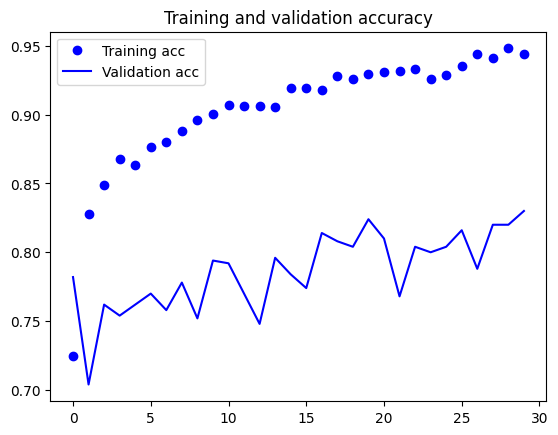

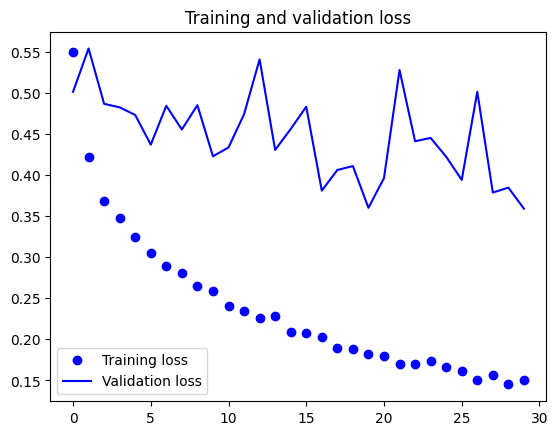

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

todo: 
Ergebniss unfreezed pre trained cnn

überleitung auf feature extraction mit data augmentation

# feature extraction cnn mit data augmentation

Warum feature extraction mit data augmentation

bessere ergebnisse wie data augmentation davor

In [ ]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

conv_base.trainable = False


model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 25088)             0         
                                                                 
 dense_18 (Dense)            (None, 256)               6422784   
                                                                 
 dense_19 (Dense)            (None, 1)                 257       
                                                                 
Total params: 21,137,729
Trainable params: 21,137,729
Non-trainable params: 0
_________________________________________________________________


In [ ]:
batch_z = 20

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note again, that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=batch_z,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=batch_z,
        class_mode='binary')


history = model.fit(
      train_generator,
      steps_per_epoch=30,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=25,
      verbose=2)

Found 2637 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/30
30/30 - 87s - loss: 0.6178 - acc: 0.6450 - val_loss: 0.5500 - val_acc: 0.7480 - 87s/epoch - 3s/step
Epoch 2/30
30/30 - 84s - loss: 0.5144 - acc: 0.7617 - val_loss: 0.5040 - val_acc: 0.7740 - 84s/epoch - 3s/step
Epoch 3/30
30/30 - 87s - loss: 0.4947 - acc: 0.7733 - val_loss: 0.5199 - val_acc: 0.7580 - 87s/epoch - 3s/step
Epoch 4/30
30/30 - 87s - loss: 0.4745 - acc: 0.7789 - val_loss: 0.4801 - val_acc: 0.7780 - 87s/epoch - 3s/step
Epoch 5/30
30/30 - 86s - loss: 0.4946 - acc: 0.7883 - val_loss: 0.4651 - val_acc: 0.7760 - 86s/epoch - 3s/step
Epoch 6/30
30/30 - 85s - loss: 0.4771 - acc: 0.7633 - val_loss: 0.4588 - val_acc: 0.7860 - 85s/epoch - 3s/step
Epoch 7/30
30/30 - 87s - loss: 0.4288 - acc: 0.8133 - val_loss: 0.5260 - val_acc: 0.7240 - 87s/epoch - 3s/step
Epoch 8/30
30/30 - 84s - loss: 0.4200 - acc: 0.8157 - val_loss: 0.4478 - val_acc: 0.7800 - 84s/epoch - 3s/step
Epoch 9/30
30/30 - 86s - loss

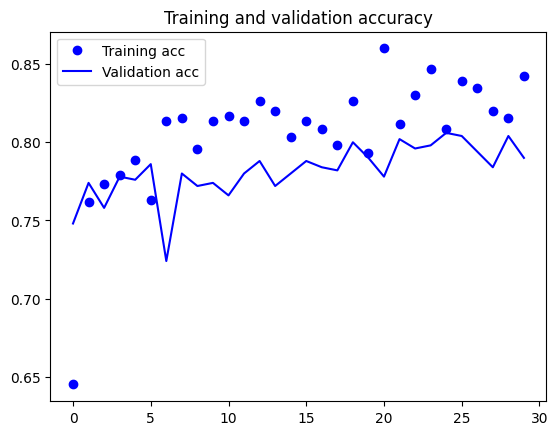

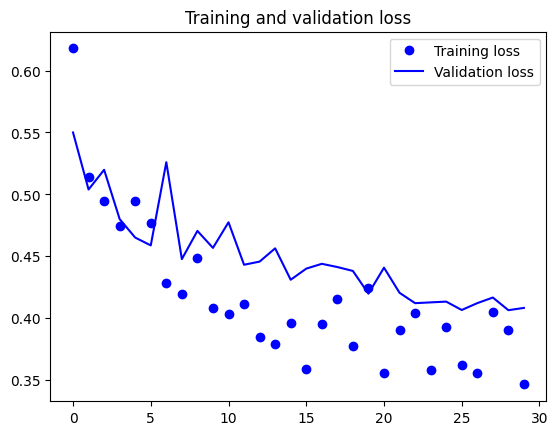

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


### Ergebnis:

Mit dem vortrainierten Modell konnten wir bessere Ergebnisse erzielen als mit allen anderen bisher verwendeten Modellen. Dies bestätigt, dass die Verwendung eines vortrainierten Modells eine sinnvolle Wahl für unsere Anwendung war. Durch die Verwendung von gelernten Gewichten und bereits vorhandenen Kenntnissen des Modells, konnten wir die Leistung unseres Modells verbessern. Aus diesem Grund haben wir uns entschieden, dieses Modell als Basis für unsere weitere Arbeit mit Hyperparameter-Tuning zu verwenden.


# Hyperparameter tuning für Methode B

Warum wir tuning von Methode B machen

In [ ]:
test_plan = {}
test_plan[0] = {"n_units": 256, "learning_rate": 2e-5, "batch_size": 20}
test_plan[1] = {"n_units": 128, "learning_rate": 2e-5, "batch_size": 20}
test_plan[2] = {"n_units": 512, "learning_rate": 2e-5, "batch_size": 20}
test_plan[3] = {"n_units": 256, "learning_rate": 2e-4, "batch_size": 20}
test_plan[4] = {"n_units": 256, "learning_rate": 2e-3, "batch_size": 20}
test_plan[5] = {"n_units": 256, "learning_rate": 2e-5, "batch_size": 40}
test_plan[6] = {"n_units": 256, "learning_rate": 2e-5, "batch_size": 60}


In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16

result_dict = {}

# All images will be [0,1] standardized
train_datagen = ImageDataGenerator(rescale=1.0/255)
valid_datagen = ImageDataGenerator(rescale=1.0/255)


for n in range(len(test_plan)):
    n_units = test_plan[n]["n_units"]
    learning_rate = test_plan[n]["learning_rate"]
    batch_size = test_plan[n]["batch_size"]

    conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    model = models.Sequential()
    model.add(conv_base)
    model.add(layers.Flatten())
    model.add(layers.Dense(n_units, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer=optimizers.RMSprop(learning_rate=learning_rate),
                  metrics=['acc'])
                      
    conv_base.trainable = False

    train_datagen = ImageDataGenerator(
          rescale=1./255,
          rotation_range=40,
          width_shift_range=0.2,
          height_shift_range=0.2,
          shear_range=0.2,
          zoom_range=0.2,
          horizontal_flip=True,
          fill_mode='nearest')
      

    # Note again, that the validation data should not be augmented!
    test_datagen = ImageDataGenerator(rescale=1./255)



    train_generator = train_datagen.flow_from_directory(
            train_dir,
            target_size=(224, 224),
            batch_size=batch_size,
            class_mode='binary')

    validation_generator = test_datagen.flow_from_directory(
            validation_dir,
            target_size=(224, 224),
            batch_size=batch_size,
            class_mode='binary')

    history = model.fit(
          train_generator,
          steps_per_epoch=2000/batch_size,
          epochs=10,
          validation_data=validation_generator,
          validation_steps=500/batch_size,
          verbose=1)
    
    
    result_dict[n] = {"n_units": n_units,  
                 "learning rate": learning_rate, 
                 "batch size": batch_size, 
                 "val_accuracy": history.history['val_acc'][-1]}

Found 1995 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/10
100/100 [==============================] - 182s 2s/step - loss: 0.5384 - acc: 0.7378 - val_loss: 0.4584 - val_acc: 0.7900
Epoch 2/10
100/100 [==============================] - 203s 2s/step - loss: 0.4435 - acc: 0.8060 - val_loss: 0.4422 - val_acc: 0.8040
Epoch 3/10
100/100 [==============================] - 183s 2s/step - loss: 0.3997 - acc: 0.8326 - val_loss: 0.4854 - val_acc: 0.7480
Epoch 4/10
100/100 [==============================] - 187s 2s/step - loss: 0.3754 - acc: 0.8471 - val_loss: 0.4904 - val_acc: 0.7460
Epoch 5/10
100/100 [==============================] - 187s 2s/step - loss: 0.3607 - acc: 0.8421 - val_loss: 0.4527 - val_acc: 0.7680
Epoch 6/10
100/100 [==============================] - 188s 2s/step - loss: 0.3511 - acc: 0.8486 - val_loss: 0.4452 - val_acc: 0.7820
Epoch 7/10
100/100 [==============================] - 188s 2s/step - loss: 0.3416 - acc: 0.8521 - val_loss: 0.4374 - va

Epoch 9/10
50/50 [==============================] - 155s 3s/step - loss: 0.3432 - acc: 0.8536 - val_loss: 0.4255 - val_acc: 0.8040
Epoch 10/10
50/50 [==============================] - 155s 3s/step - loss: 0.3451 - acc: 0.8461 - val_loss: 0.4655 - val_acc: 0.7520
Found 1995 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/10
33/33 [==============================] - 197s 6s/step - loss: 0.5801 - acc: 0.7008 - val_loss: 0.5006 - val_acc: 0.7840
Epoch 2/10
33/33 [==============================] - 197s 6s/step - loss: 0.4682 - acc: 0.8085 - val_loss: 0.5458 - val_acc: 0.6960
Epoch 3/10
33/33 [==============================] - 196s 6s/step - loss: 0.4385 - acc: 0.8080 - val_loss: 0.4466 - val_acc: 0.7740
Epoch 4/10
33/33 [==============================] - 197s 6s/step - loss: 0.4052 - acc: 0.8296 - val_loss: 0.4366 - val_acc: 0.7940
Epoch 5/10
33/33 [==============================] - 199s 6s/step - loss: 0.3945 - acc: 0.8286 - val_loss: 0.4421 - val_acc: 0.7720

In [ ]:
import pandas as pd
pd.DataFrame.from_dict(result_dict, orient = "index")

,n_units,learning rate,batch size,val_accuracy
0,256,0.00002,20,0.792
1,128,0.00002,20,0.760
2,512,0.00002,20,0.764
3,256,0.00020,20,0.724
4,256,0.00200,20,0.720
5,256,0.00002,40,0.752
6,256,0.00002,60,0.828


In [ ]:
# Evaluate best models

TODO

- Ergebnis
- Überleitung 

# pretrained cnn mit feature extraction fine tuning

Todo
- Erklärung warum wir das verwenden wollen

In [ ]:
conv_base.trainable = True
set_trainable = False

for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

history = model.fit(
      train_generator,
      steps_per_epoch=30,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=25)

Epoch 1/30
30/30 [==============================] - 102s 3s/step - loss: 0.3983 - acc: 0.8067 - val_loss: 0.3987 - val_acc: 0.7920
Epoch 2/30
30/30 [==============================] - 100s 3s/step - loss: 0.3525 - acc: 0.8217 - val_loss: 0.4791 - val_acc: 0.7620
Epoch 3/30
30/30 [==============================] - 102s 3s/step - loss: 0.3852 - acc: 0.8150 - val_loss: 0.3922 - val_acc: 0.8120
Epoch 4/30
30/30 [==============================] - 100s 3s/step - loss: 0.3326 - acc: 0.8433 - val_loss: 0.3910 - val_acc: 0.7960
Epoch 5/30
30/30 [==============================] - 98s 3s/step - loss: 0.3456 - acc: 0.8417 - val_loss: 0.4281 - val_acc: 0.7820
Epoch 6/30
30/30 [==============================] - 99s 3s/step - loss: 0.3634 - acc: 0.8367 - val_loss: 0.4009 - val_acc: 0.7940
Epoch 7/30
30/30 [==============================] - 101s 3s/step - loss: 0.3265 - acc: 0.8400 - val_loss: 0.4795 - val_acc: 0.7660
Epoch 8/30
30/30 [==============================] - 98s 3s/step - loss: 0.3448 - acc:

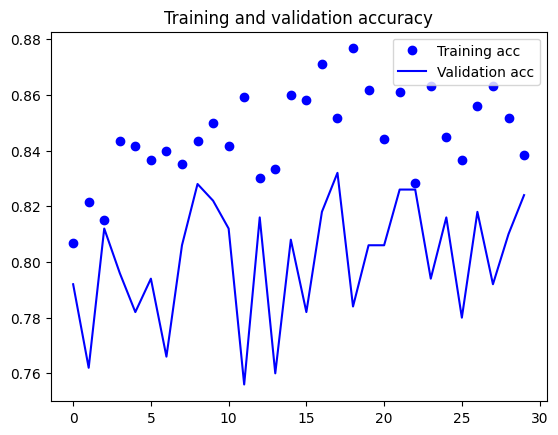

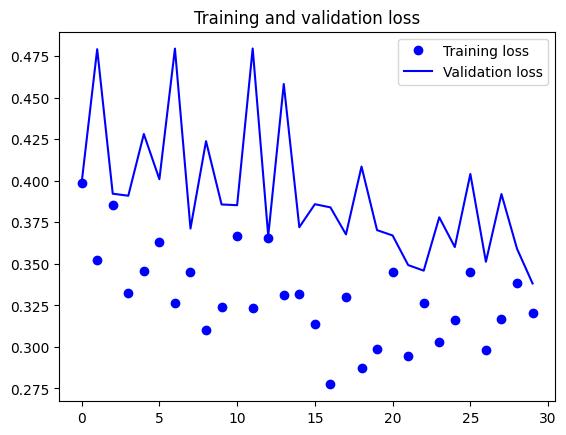

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)
print('test loss:', test_loss)

Found 660 images belonging to 2 classes.


E:\Conda\envs\main\lib\site-packages\ipykernel_launcher.py:7: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  import sys


test acc: 0.8500000238418579
test loss: 0.33545154333114624


# Fazit

### Cross Validation:
    
Cross Validation ist ein Verfahren zum Tranieren von Machine-Learning-Modellen. cross valiadtion ist dafür da, den datensatz mir sich selbst zu prüfen, indem tempoär validations daten extraheirt werden. deswegen läuft es mehrmals druch. 

Wir haben uns für die k-fach Kreuzvalidierung (k-fold cross-validation) entschieden, die die Daten in k gleich große Teile aufteilt und jeden Teil als Testset verwendet, während die anderen Teile als Trainingsset verwendet werden.
Sie wird verwendet, um das Risiko von "overfitting" (Überanpassung) zu verringern.


In diesem Fall wird der Datensatz in 70% Traning und 30% validation große Teile aufgeteilt und das Modell wird 3-mal trainiert und getestet. In jeder Iteration wird ein anderer Fold generiert und als Testset verwendet. Während die übrigen Daten als Trainingsset verwendet werden.

Unser Ergebniss Wert bei der coss-validation war: 65 unn die schwankung war bei +-6%. Dieser Wert lässt darauf schließen, dass das Ergebniss der Kreuzvalidierung ein mittel guter Wert ist und auch gegenüber den vorherigen Modellen leider keine verbesserung darstellt.